In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


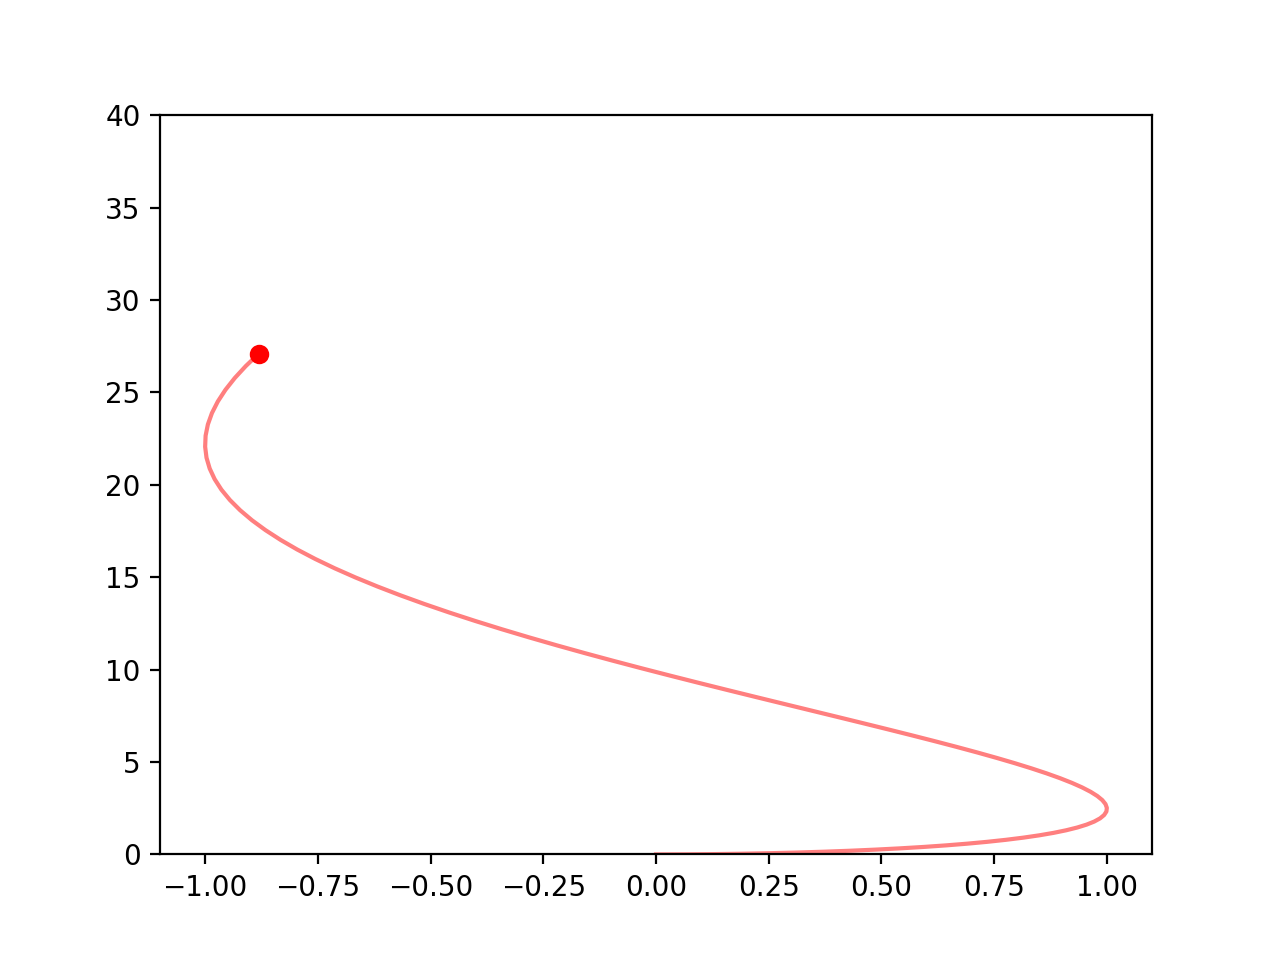

In [3]:
t = np.linspace(0, 2*np.pi, 100)
x = np.sin(t)
y = t**2
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((-1.1, 1.1))
ax.set_ylim((0, 40))
particle, = plt.plot([],[], marker='o', color='r')
traj, = plt.plot([],[], color='r', alpha=0.5)

def update(i):
    particle.set_data(x[i], y[i])
    traj.set_data(x[:i+1], y[:i+1])
    return particle, traj

ani = animation.FuncAnimation(fig, update, frames=range(100), interval=25)
plt.show()

## Problem 1

Use the FuncAnimation class to animate the function $y = sin(x + \frac{t}{10})$ where $x \in [0, 2\pi]$, and t ranges from 0 to 100 seconds.

<IPython.core.display.Javascript object>


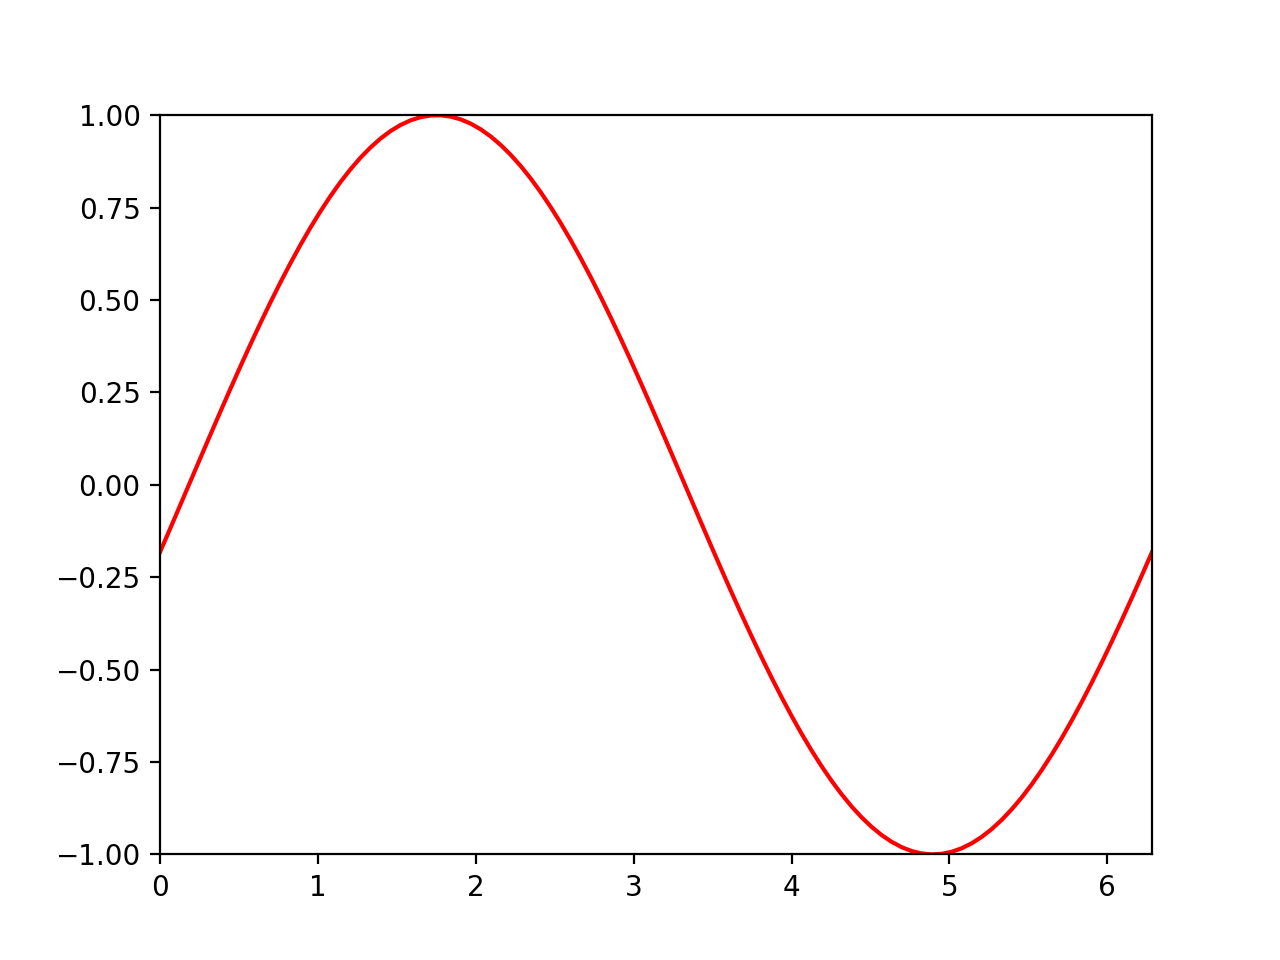

In [4]:
t = np.linspace(0, 100, 100)
x = np.linspace(0, 2*np.pi, 100)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((-0, 2*np.pi))
ax.set_ylim((-1, 1))
traj, = plt.plot([],[], color='r')

def update(i):
    traj.set_data(x, np.sin(x + i/10))
    return particle, traj

ani = animation.FuncAnimation(fig, update, frames=range(100), interval=25)
plt.show()



## Problem 2

The orbits for Mercury, Venus, Earth, and Mars are stored in the file `orbits.npz`. The file contains four NumPy arrays: `mercury`, `venus`, `earth`, and `mars`. The first column of each array contains the x-coordinates, the second column contains the y-coordinates, and the third column contians the z-coordinates, all relative to the Sun, and expressed in AU (astronomical units, the average distance between Earth and the Sun, approximately 150 million
kilometers).

Use `np.load('orbits.npz')` to load the data for the four planets' orbits. Create a 3D plot of the orbits, and compare your results with Figure 1.1.

<IPython.core.display.Javascript object>


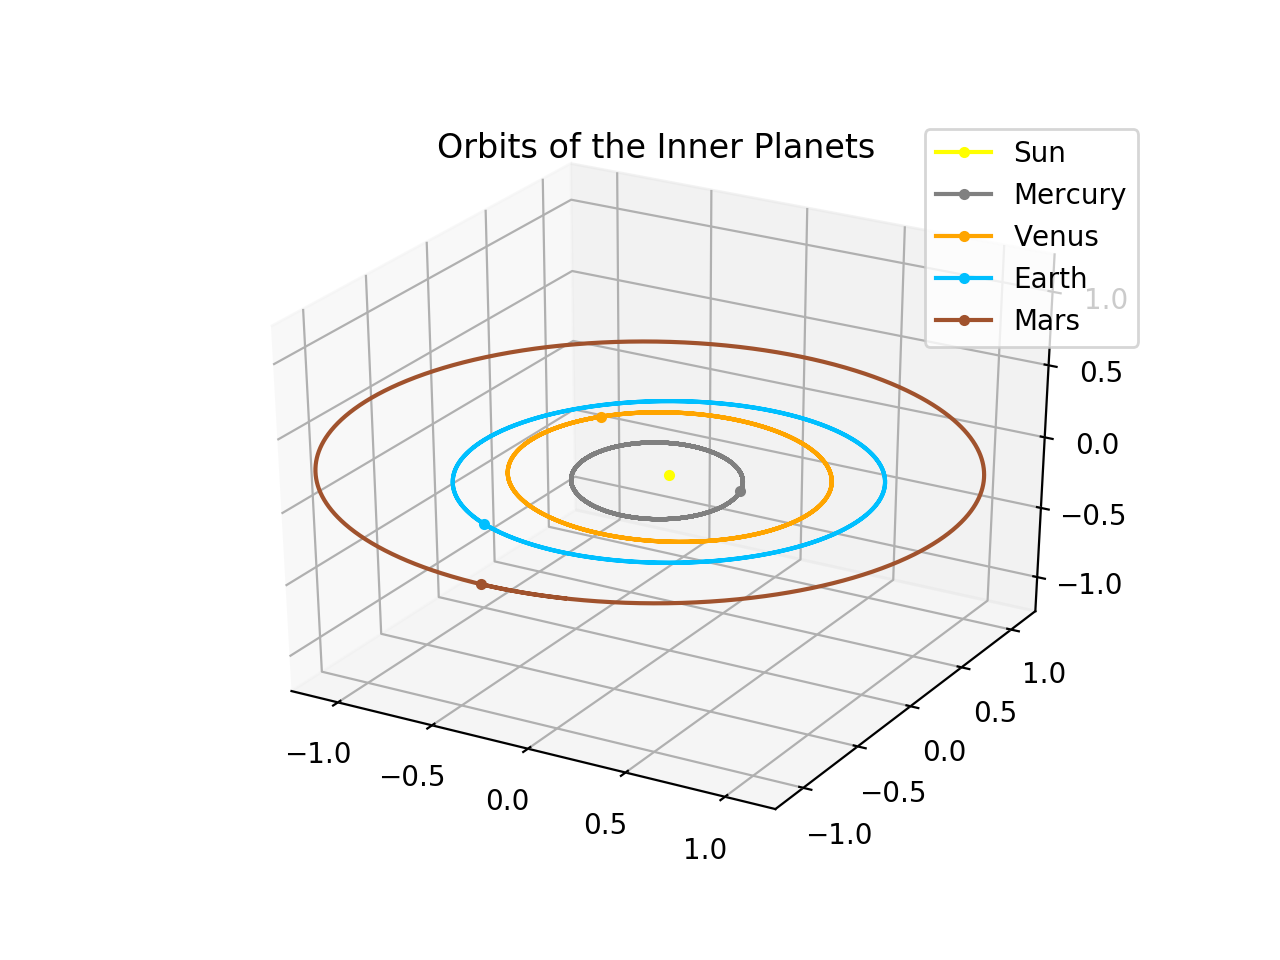

In [5]:
from mpl_toolkits.mplot3d import Axes3D
orbits = np.load('orbits.npz')
mercury_x = orbits["mercury"][:,0]
mercury_y = orbits["mercury"][:,1]
mercury_z = orbits["mercury"][:,2]

venus_x = orbits["venus"][:,0]
venus_y = orbits["venus"][:,1]
venus_z = orbits["venus"][:,2]

earth_x = orbits["earth"][:,0]
earth_y = orbits["earth"][:,1]
earth_z = orbits["earth"][:,2]

mars_x = orbits["mars"][:,0]
mars_y = orbits["mars"][:,1]
mars_z = orbits["mars"][:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d((-1.2, 1.2))
ax.set_ylim3d((-1.2, 1.2))
ax.set_zlim3d((-1.2, 1.2))

plt.plot([0],[0],[0], marker='o', markersize=3, color="yellow", label="Sun")
plt.plot(mercury_x, mercury_y, mercury_z, markevery=[0], marker='o', markersize=3, color='0.5', label="Mercury")
plt.plot(venus_x, venus_y, venus_z, markevery=[0], marker='o', markersize=3, color='orange', label="Venus")
plt.plot(earth_x, earth_y, earth_z, markevery=[0], marker='o', markersize=3, color='deepskyblue', label="Earth")
plt.plot(mars_x, mars_y, mars_z, markevery=[0], marker='o', markersize=3, color='sienna', label="Mars")

plt.legend()
plt.title("Orbits of the Inner Planets")
plt.show()

## Problem 3

Each row of the arrays in `orbits.npz` gives the position of the planets at a
particular time. The arrays have 1400 points in time over a 700 day period (beginning on 2018-5-30). Create a 3D animation of the planet orbits. Display lines for the trajectories of the orbits and points for the current positions of the planets at each point in time. Your update() function will need to return a list of `Line3D` objects, one for each orbit trajectory and one for each planet position marker. Using `animation.save()`, save your animated plot as "planet_ani.mp4".

To display the mp4 video in the Jupyter Notebook, run the following code in a markdown cell:

`<video src="planet_ani.mp4" controls>`

In [10]:
from mpl_toolkits.mplot3d import Axes3D
animation.writer = animation.writers['ffmpeg']
plt.ioff()

orbits = np.load('orbits.npz')
mercury_x = orbits["mercury"][:,0]
mercury_y = orbits["mercury"][:,1]
mercury_z = orbits["mercury"][:,2]

venus_x = orbits["venus"][:,0]
venus_y = orbits["venus"][:,1]
venus_z = orbits["venus"][:,2]

earth_x = orbits["earth"][:,0]
earth_y = orbits["earth"][:,1]
earth_z = orbits["earth"][:,2]

mars_x = orbits["mars"][:,0]
mars_y = orbits["mars"][:,1]
mars_z = orbits["mars"][:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d((-1.2, 1.2))
ax.set_ylim3d((-1.2, 1.2))
ax.set_zlim3d((-1.2, 1.2))

ax.plot([0],[0],[0], marker='o', markersize=3, color="yellow", label="Sun")
p1, = plt.plot([], [], [], marker='o', markersize=3, color='0.5', label="Mercury")
t1, = plt.plot([],[],[], color='0.5', alpha=0.5)
p2, = plt.plot([], [], [], marker='o', markersize=3, color='orange', label="Venus")
t2, = plt.plot([],[],[], color='orange', alpha=0.5)
p3, = plt.plot([], [], [], marker='o', markersize=3, color='deepskyblue', label="Earth")
t3, = plt.plot([],[],[], color='deepskyblue', alpha=0.5)
p4, = plt.plot([], [], [], marker='o', markersize=3, color='sienna', label="Mars")
t4, = plt.plot([],[],[], color='sienna', alpha=0.5)

def update(i):
    p1.set_data(mercury_x[i], mercury_y[i])
    p1.set_3d_properties(mercury_z[i])
    t1.set_data(mercury_x[:i+1], mercury_y[:i+1])
    t1.set_3d_properties(mercury_z[:i+1])
    
    p2.set_data(venus_x[i], venus_y[i])
    p2.set_3d_properties(venus_z[i])
    t2.set_data(venus_x[:i+1], venus_y[:i+1])
    t2.set_3d_properties(venus_z[:i+1])
    
    p3.set_data(earth_x[i], earth_y[i])
    p3.set_3d_properties(earth_z[i])
    t3.set_data(earth_x[:i+1], earth_y[:i+1])
    t3.set_3d_properties(earth_z[:i+1])
    
    p4.set_data(mars_x[i], mars_y[i])
    p4.set_3d_properties(mars_z[i])
    t4.set_data(mars_x[:i+1], mars_y[:i+1])
    t4.set_3d_properties(mars_z[:i+1])

    return p1, t1, p2, t2, p3, t3, p4, t4

ani = animation.FuncAnimation(fig, update, frames=range(1400), interval=25)
plt.legend()
plt.suptitle("Orbits of the Inner Planets by Seong-Eun Cho")

ani.save('planet_ani.mp4')


<video src="planet_ani.mp4" controls>

## Problem 4

Make a surface plot of the bivariate normal density function given by:

$$f(\mathbf{x}) = \frac{1}{\sqrt{det(2\pi\Sigma)}}exp[-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^{T}\Sigma^{-1}(\mathbf{x}-\mathbf{\mu})]$$

Where $\mathbf{x} = [x,y]^T \in \mathbb{R}^2$, $\mathbf{\mu} = [0,0]^T$ is the mean vector, and: $$\Sigma = \begin{bmatrix} 1 & 3/5 \\ 3/5 & 2 \end{bmatrix}$$ is the covariance matrix.

<IPython.core.display.Javascript object>


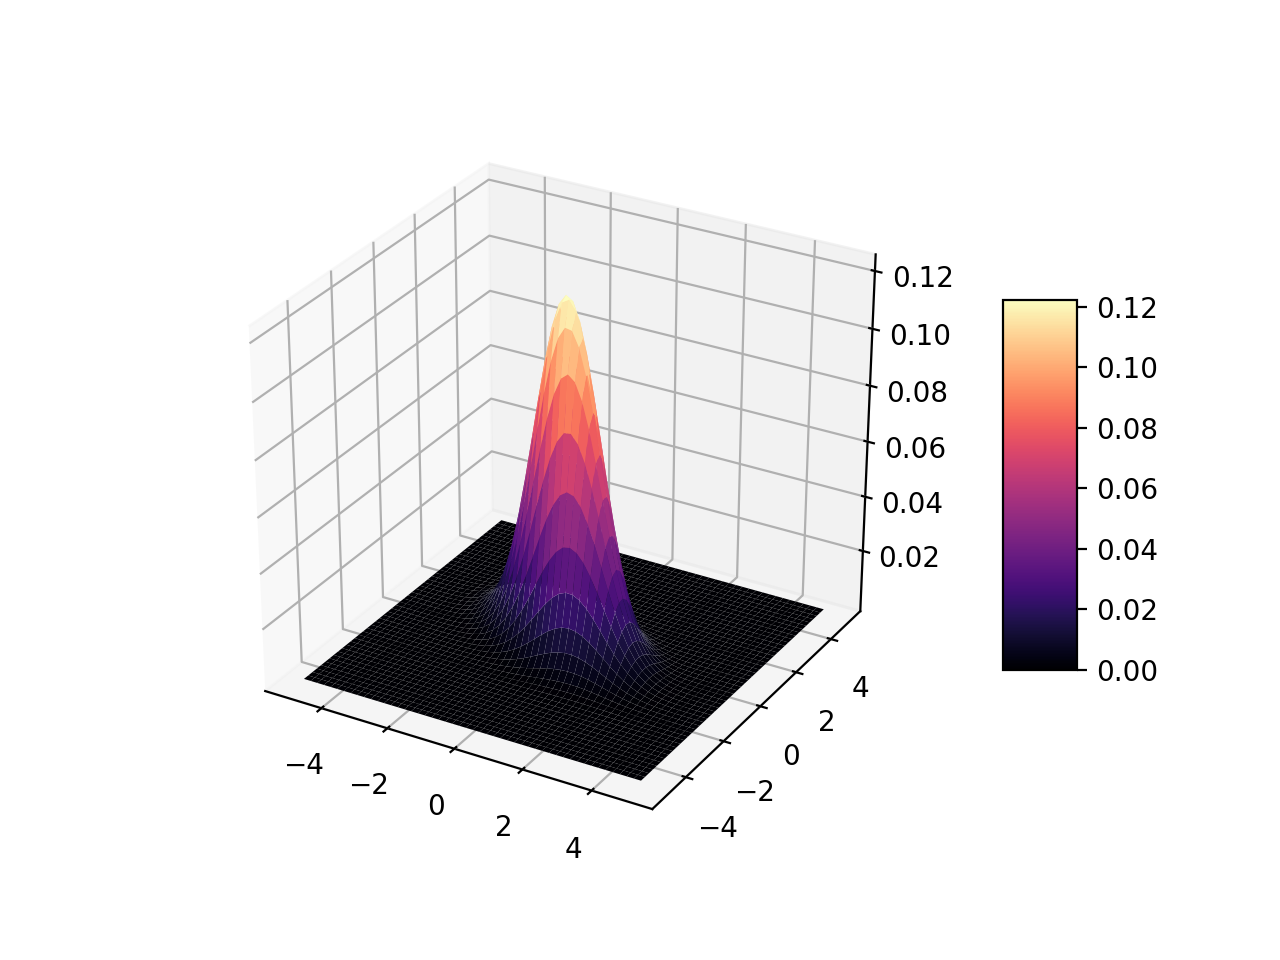

In [6]:
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-5,5)
y = np.linspace(-5,5)
X, Y = np.meshgrid(x,y)

cov = np.array([[1, 3/5], [3/5, 2]])
cov_inv = np.linalg.inv(cov)
A = cov[0,0]*X**2 + cov[0,1]*X*Y + cov[1,0]*X*Y + cov[1,1]*Y**2
Z = 1/(np.sqrt(np.linalg.det(2*np.pi*cov))) * np.exp((-1/2)*(A))

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='magma')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


## Problem 5

Use the data in vibration.npz to produce a surface animation of the solution
to the wave equation for an elastic rectangular membrane. The file contains three NumPy arrays: `X`, `Y`, `Z`. `X` and `Y` are meshgrids of shape `(300,200)` corresponding to 300 points in
the y-direction and 200 points in the x-direction, all corresponding to a 2x3 rectangle with one corner at the origin. `Z` is of shape `(150,300,200)`, giving the height of the vibrating membrane at each (x,y) point for 150 values of time. In the language of partial differential equations, this is the solution to the following intital/boundary value problem for the wave equation:

$$u_{tt} = 6^2(u_{xx}+u_{yy})$$
$$(x,y) \in [0,2]\times[0,3],t \in [0,5]$$
$$u(t,0,y)=u(t,2,y)=u(t,x,0)=u(t,x,3) = 0$$
$$u(0,x,y) = xy(2-x)(3-y)$$

Load the data with `np.load('vibration.npz')`. Create a 3D surface animation of the vibrating membrane. Save the animation as `vibration.mp4`.

In [8]:
animation.writer = animation.writers['ffmpeg']
plt.ioff()

data = np.load('vibration.npz')
X = data['X']
Y = data['Y']
Z = data['Z']

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# Plot the surface.
surf = ax.plot_surface(X, Y, Z[0], cmap='coolwarm')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim((-4,4))
def update(i):
    ax.clear()
    ax.set_zlim((-4,4))
    surf = ax.plot_surface(X,Y,Z[i], cmap='coolwarm')
    
ani = animation.FuncAnimation(fig, update, frames=range(150), interval=100)
plt.suptitle("Vibrating membrane by Seong-Eun Cho")
ani.save('vibration_ani.mp4')


<video src="vibration_ani.mp4" controls>